In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
os.getcwd()

'C:\\Users\\CH199KV\\OneDrive - EY\\Desktop\\Python Programming Course'

In [8]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [9]:
len(movies)

559

In [10]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [12]:
movies.columns = ['Film','Genre', 'CriticRating','AudienceRating', \
                  'BudgetMillions', 'Year']

In [13]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [15]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [16]:
#we need to convert Film, Genre and Year into categorical variables
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [18]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [19]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

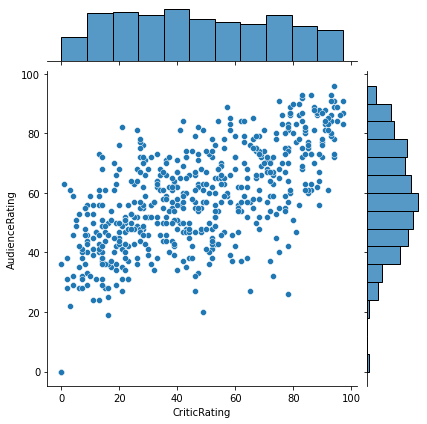

In [21]:
#Jointplots

j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

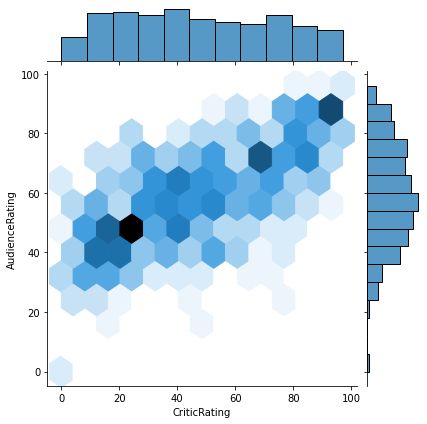

In [22]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

------

In [23]:
#Histograms

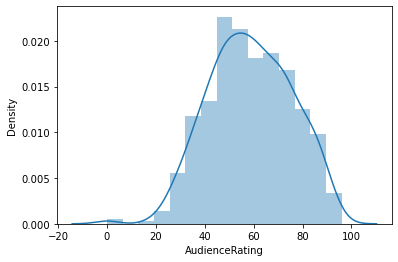

In [24]:
m1 = sns.distplot(movies.AudienceRating, bins=15)

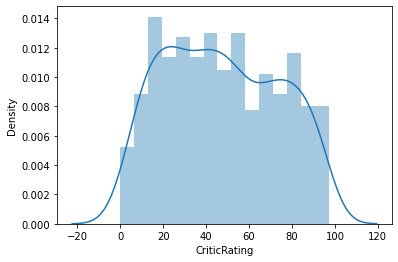

In [25]:
m1 = sns.distplot(movies.CriticRating, bins=15)

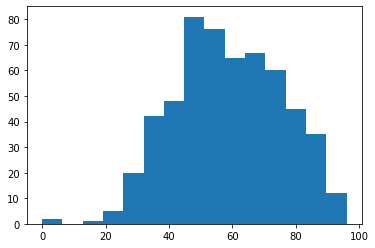

In [26]:

n1 = plt.hist(movies.AudienceRating, bins=15)

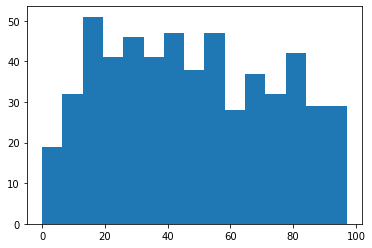

In [27]:
n1 = plt.hist(movies.CriticRating, bins=15)

------

In [28]:
#Stacked Histogram

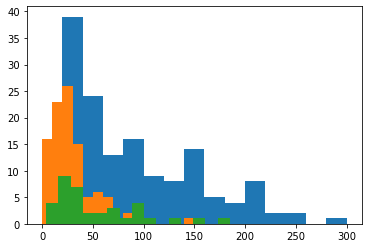

In [29]:
#movies[movies.Genre == 'Drama'].BudgetMillions
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

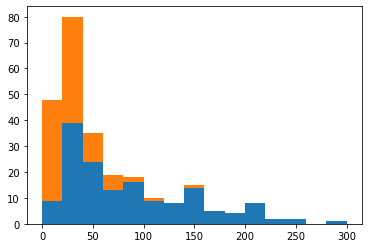

In [30]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, \
          movies[movies.Genre == 'Drama'].BudgetMillions], \
         bins=15, stacked=True)
plt.show()

In [31]:
### if we want to repeat the stacking for n numbers of Genres, we can use loops 
# we need to iterate through the Genres

In [32]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [33]:
# we have Genre as a categorical variable therefore we can use the above!
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


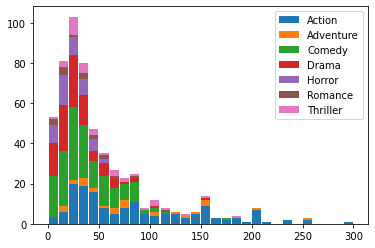

In [34]:
#let's use this list to plot through the stacked histogram
list1 = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
plt.hist(list1, bins=30, stacked=True, rwidth = 0.9, label=mylabels)
plt.legend()
plt.show()

------

In [35]:
###KDE Plot - Kernel Density Estimate plot

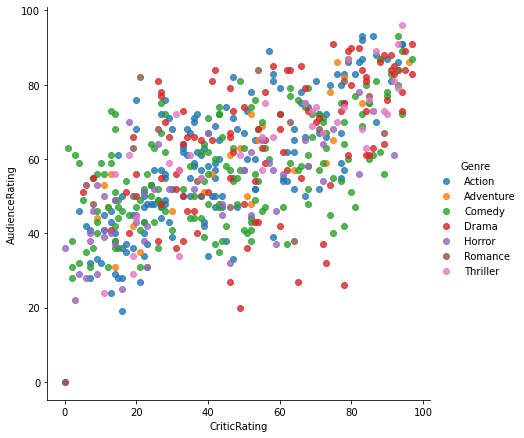

In [36]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', \
                 fit_reg=False, hue='Genre', size=6, aspect=1)

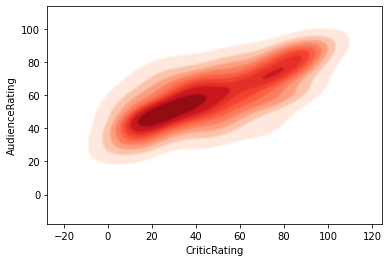

In [37]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Reds')
#TIP:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='Reds') 
##running without shade gives edges, combining smooths edges


-----

In [38]:
#Working with Subplots

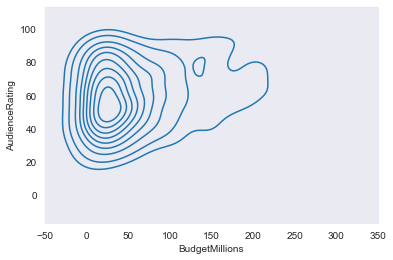

In [39]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

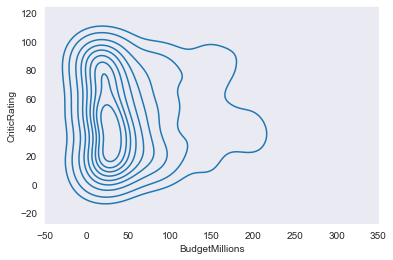

In [40]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-40.0, 250.0)]

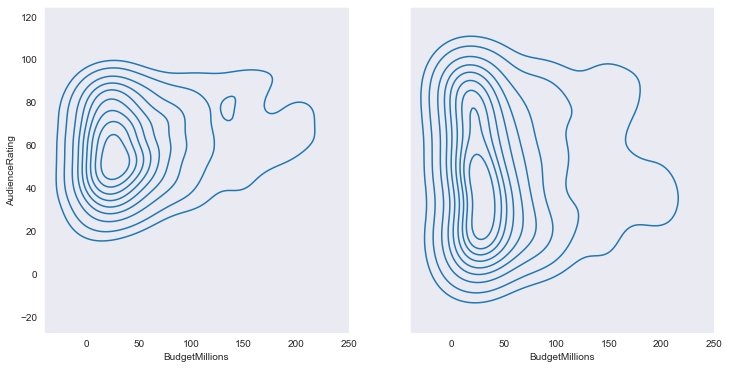

In [41]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True) 
#1 row 2 columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-40,250))

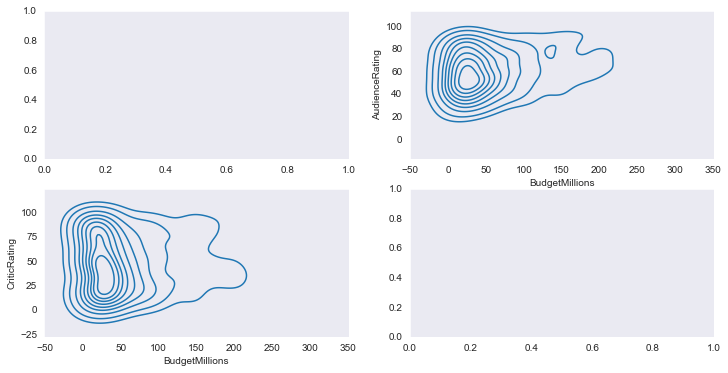

In [42]:
f, axes = plt.subplots(2, 2, figsize=(12,6)) #2 row 2 columns
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,0])

------

In [43]:
#Violin Plots

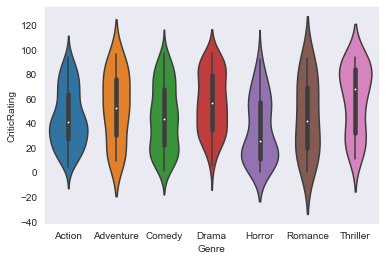

In [44]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

### What is the violin plot telling us? 

We can see the concentration of points by inferring the width from the violin plots 

In [45]:
#Boxplot

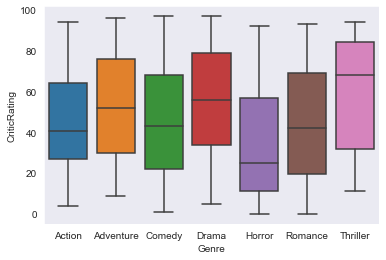

In [46]:
z = sns.boxplot(data=movies, x='Genre', y='CriticRating')

### What is the box plot telling us?

all else being equal, to more likely get a higher critic rating, with the thriller genre

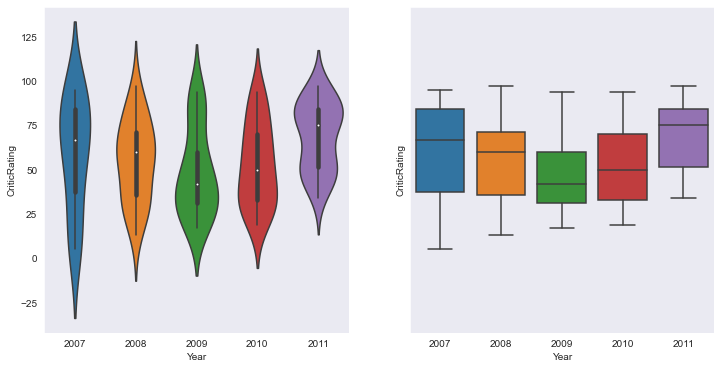

In [47]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[0])
y = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1])

------

In [48]:
# Facet Grids

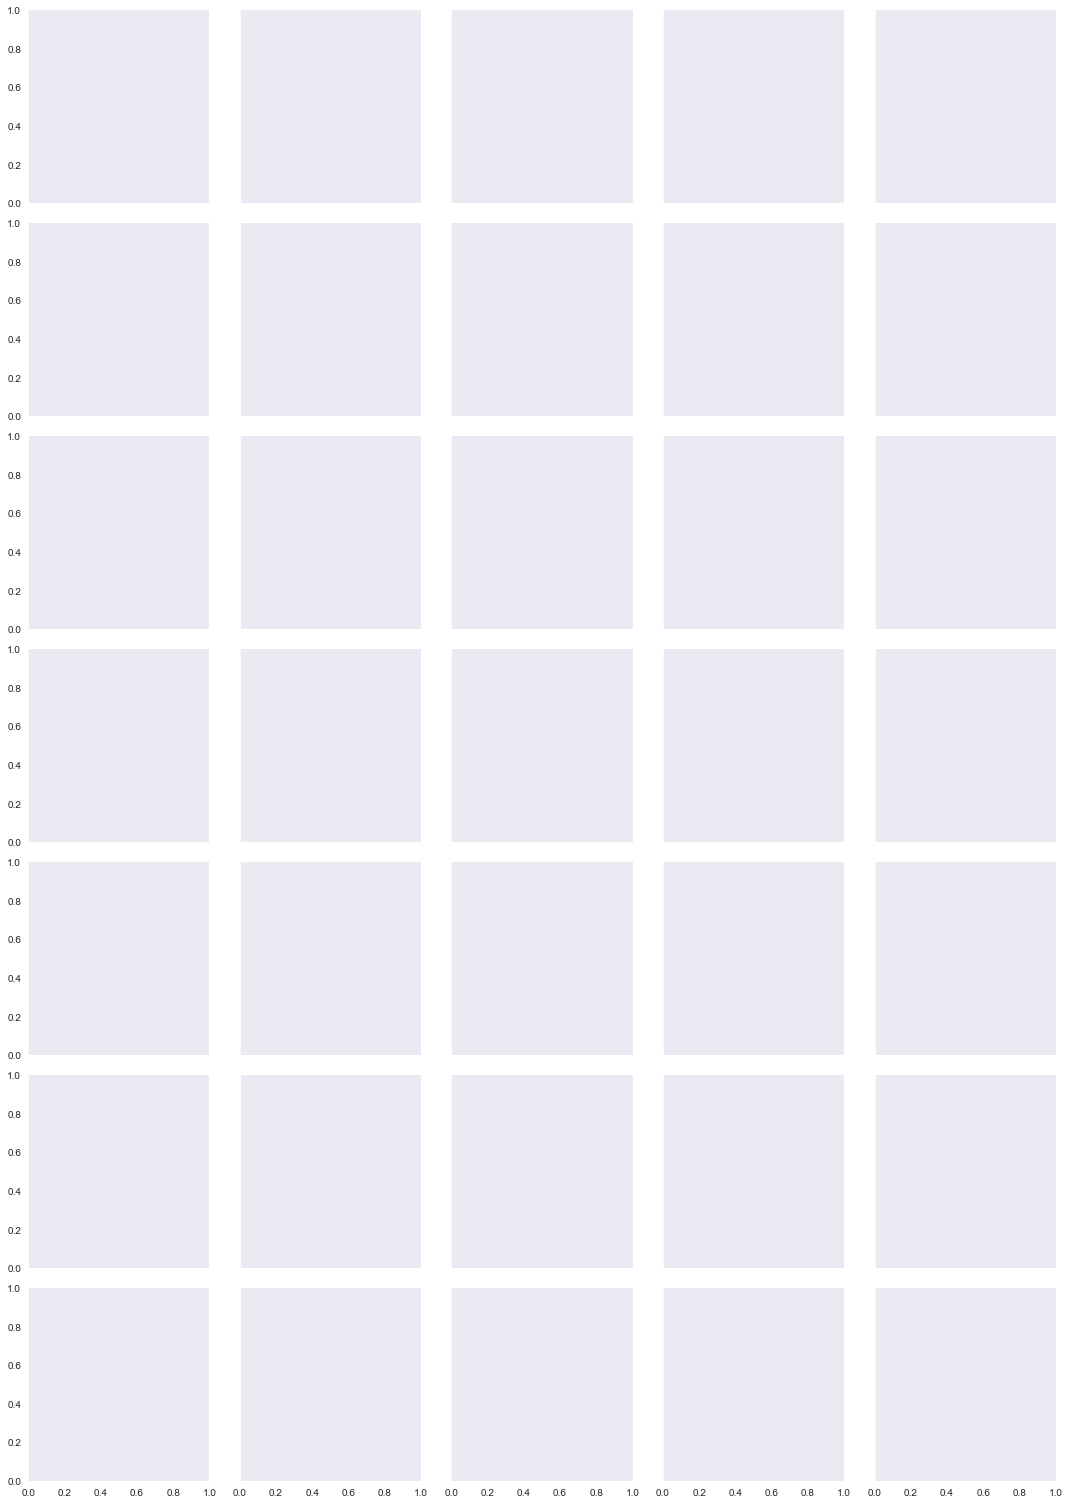

In [49]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

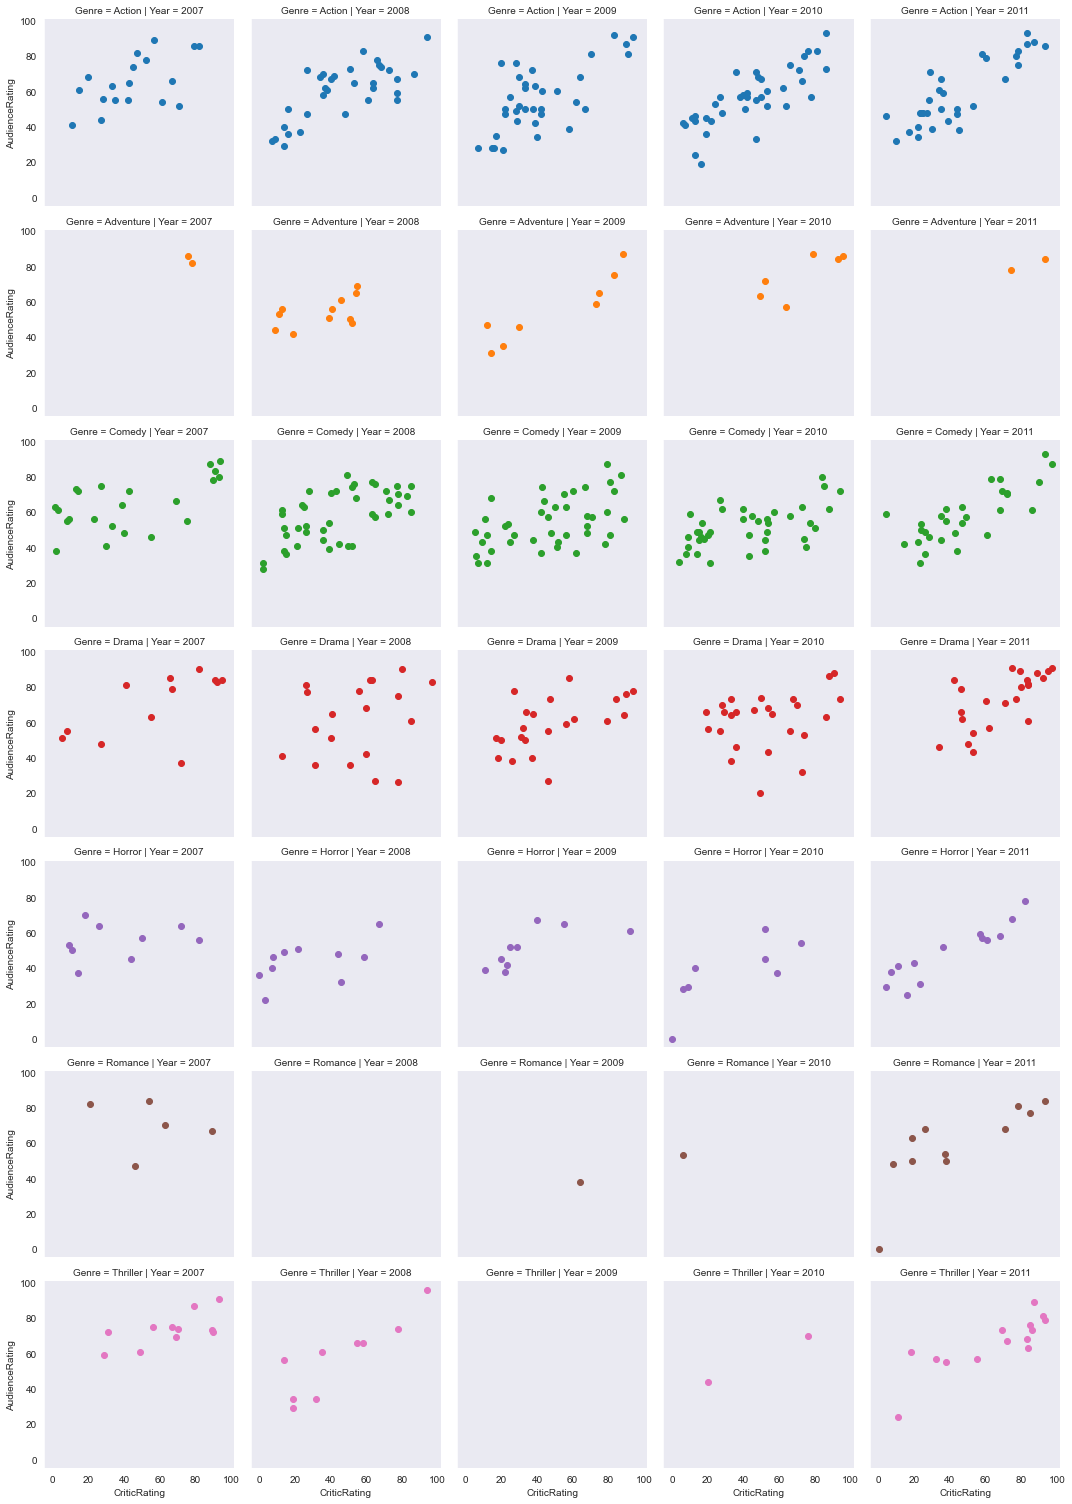

In [50]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
#populate facet grid
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

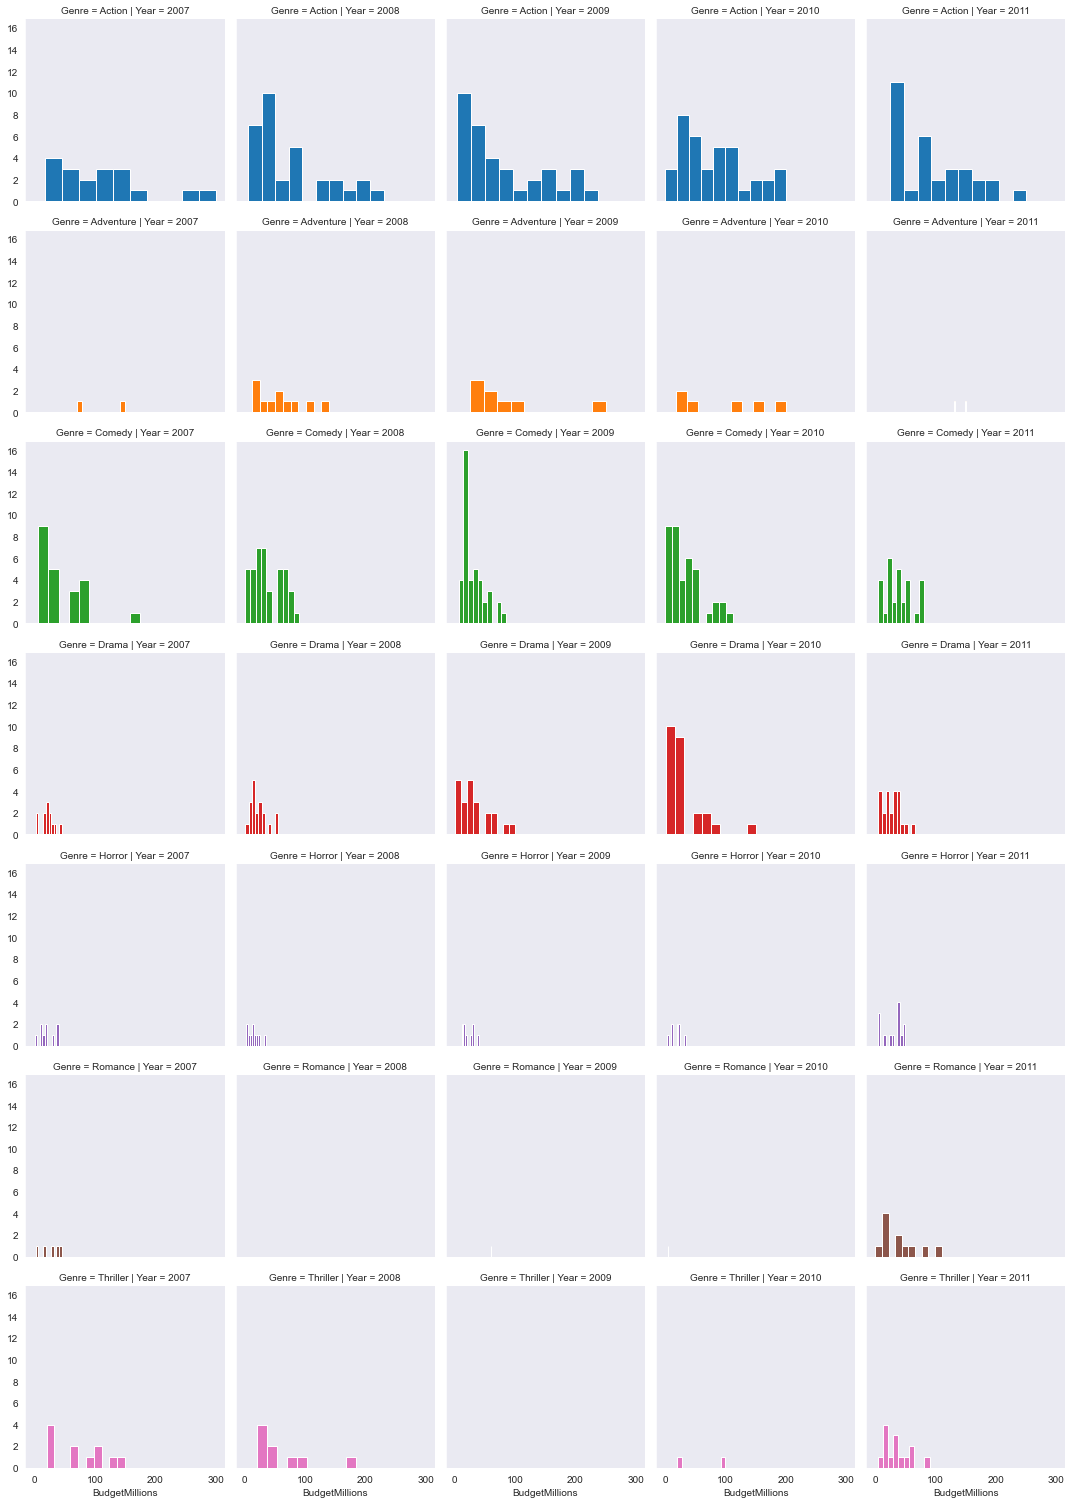

In [51]:
#can populate with any type of chart e.g. histograms
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
#populate facet grid
g = g.map(plt.hist, 'BudgetMillions')

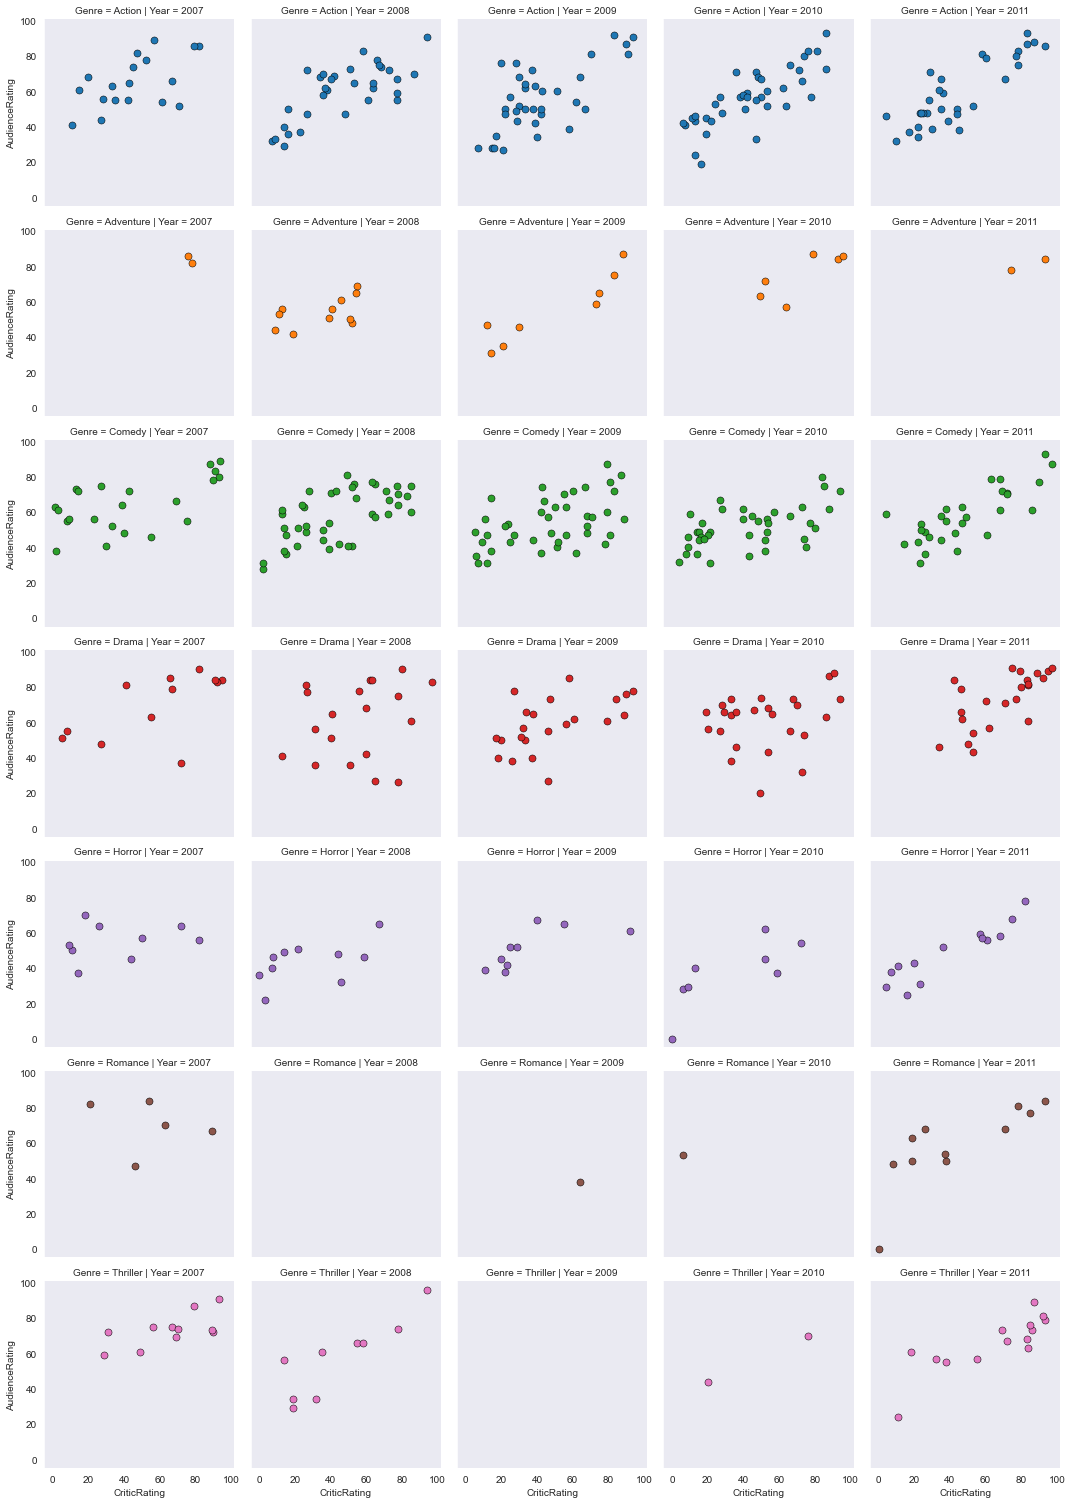

In [52]:
#back to scatter plots
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
#dictionary of keywords
kws = dict(s=50, linewidth=0.5, edgecolor='black')
#populate facet grid
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

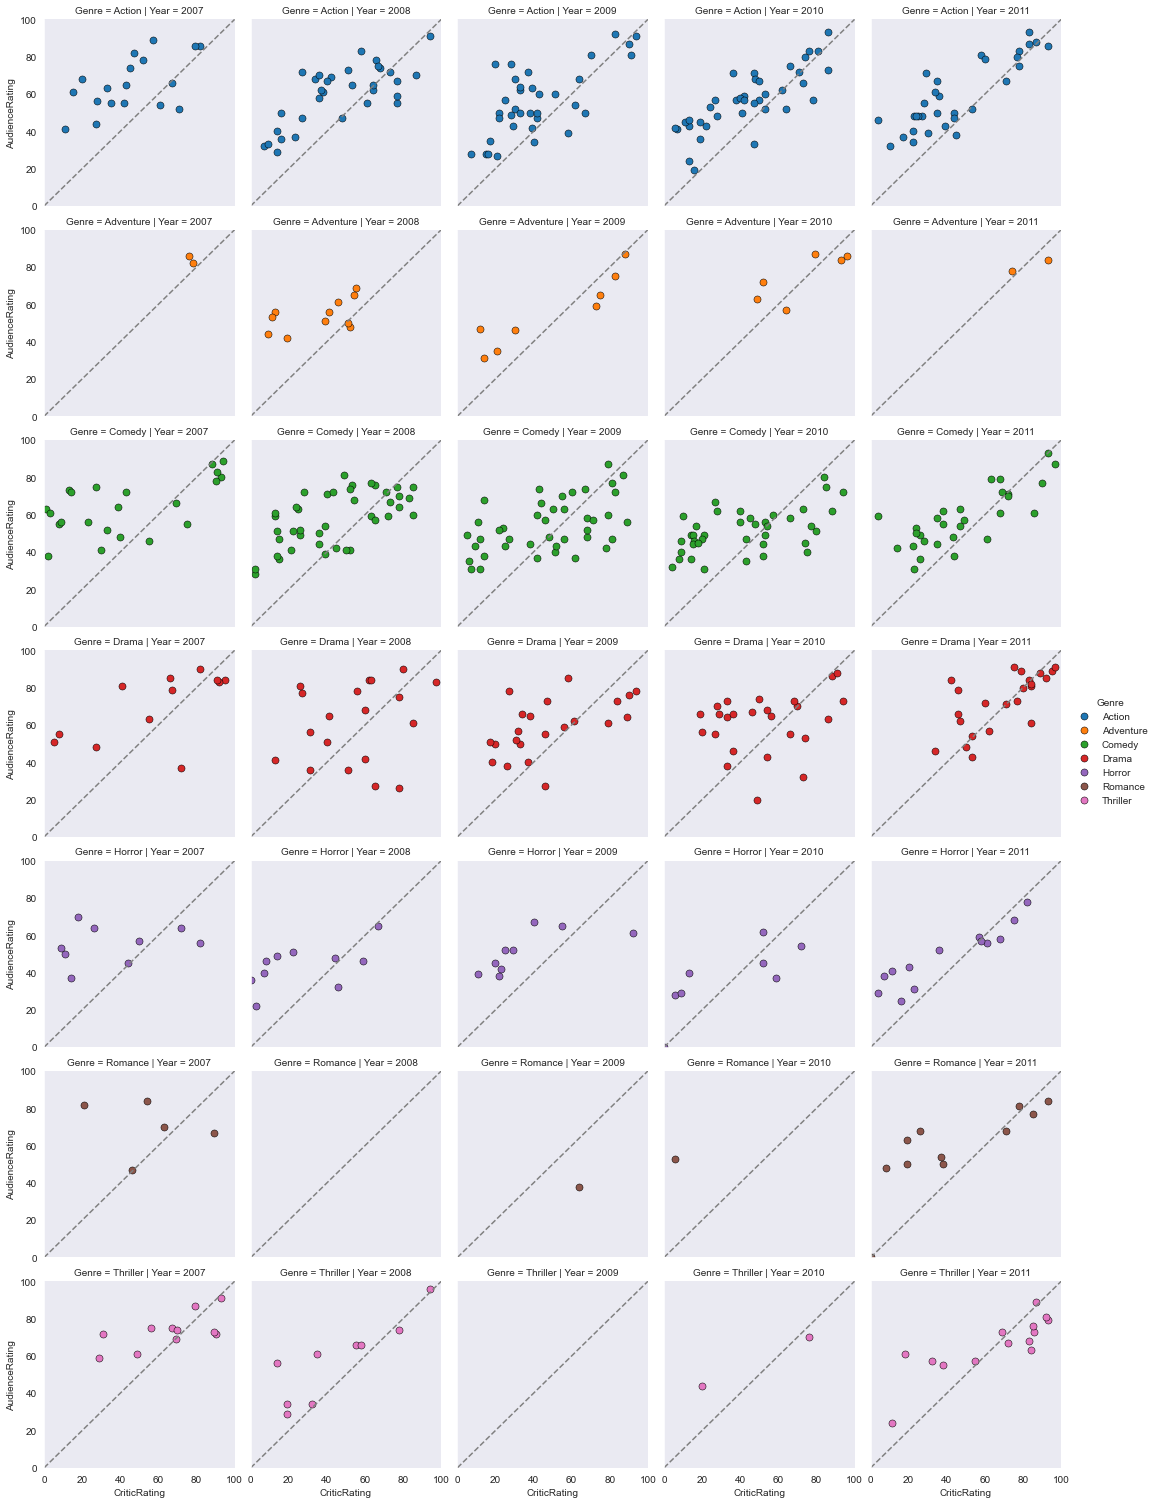

In [53]:
#Controlling axes and adding diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

# set limit for axes
g.set(xlim=(0,100), ylim=(0,100))

#diagonals, have to iterate through and add diagonals to each plot
# .axes accesses indiv plot axes, .flat flattens array into list
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c='gray', linestyle='--')
    
#add legend
g.add_legend()

-----

In [54]:
# Building Dashboards in Python 

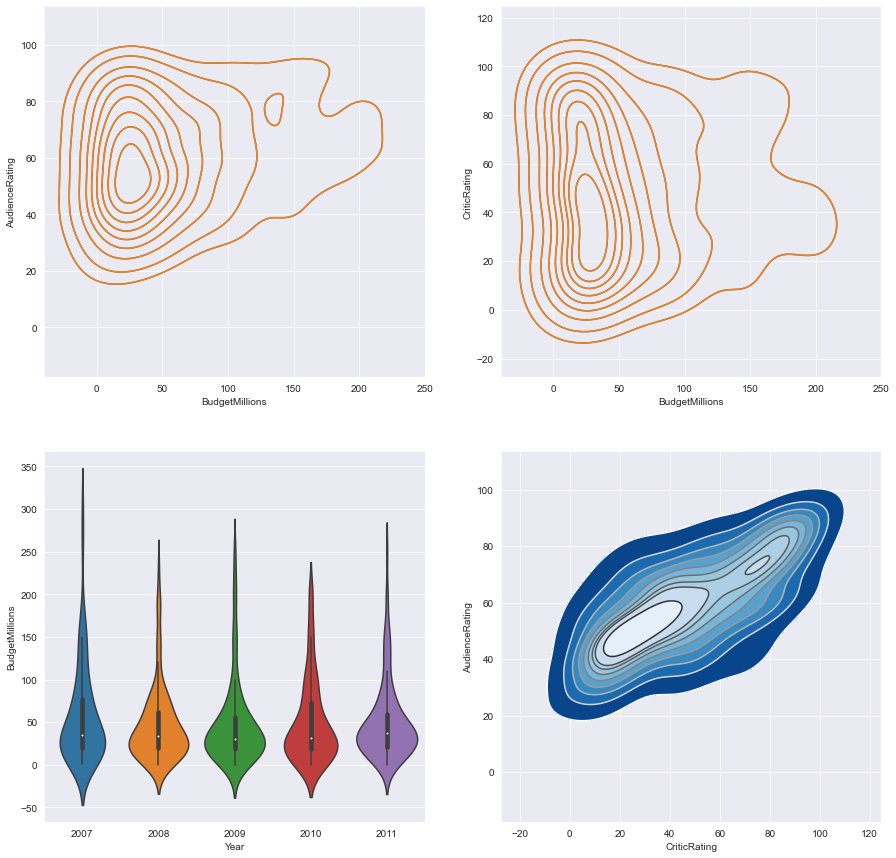

In [55]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 ax=axes[0,0])

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 ax=axes[0,1])
#change violin plots to budget millions
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0])

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='gist_gray_r', ax=axes[1,1]) 

#for non-seaborn plots use:
#axes[1,1].hist(movies.CriticRating, bins=15)

k1.set(xlim=(-40,250))
k2.set(xlim=(-40,250))
plt.show()

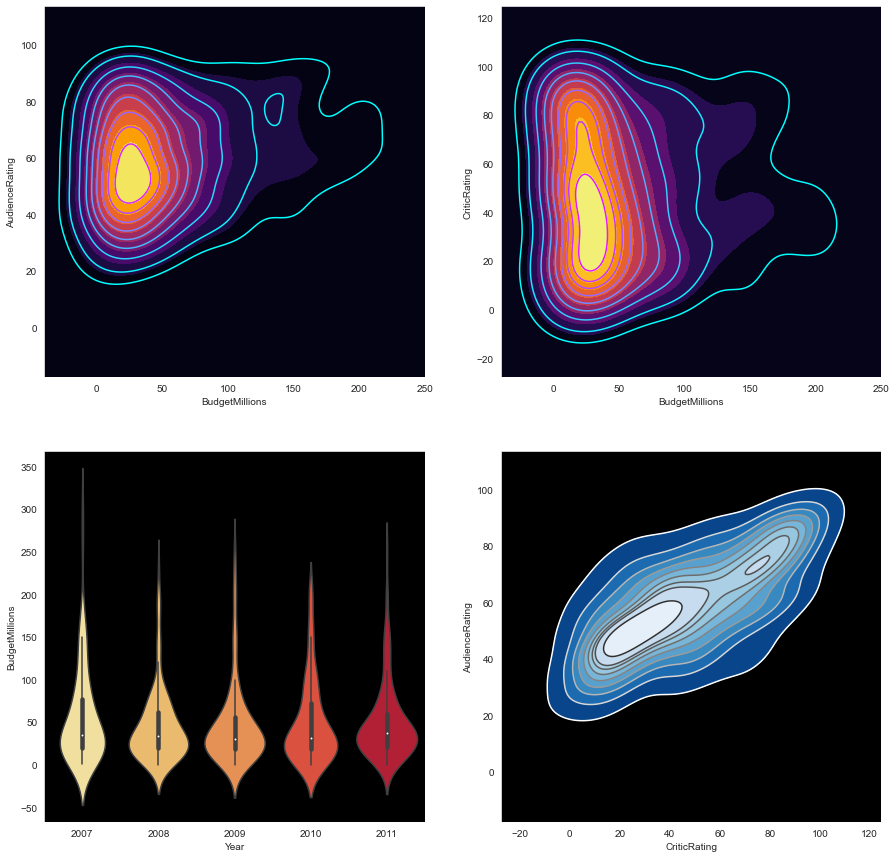

In [56]:
sns.set_style("dark", {"axes.facecolor": "black"})
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, \
                 cmap='cool', ax=axes[0,0])

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, \
                 cmap='cool', ax=axes[0,1])
#change violin plots to budget millions
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], \
                  palette='YlOrRd')

k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 cmap='gist_gray_r', ax=axes[1,1]) 

#for non-seaborn plots use:
#axes[1,1].hist(movies.CriticRating, bins=15)

k1.set(xlim=(-40,250))
k2.set(xlim=(-40,250))
plt.show()

#### pyplots vs seaborn

- axes is a pyplot object! 
- things that are contained in a seaborn package are invisible from seaborn 
- you can call axes[].hist BUT cannot call axes[].violinplot !!

In [57]:
#let's make the stacked histogram look better!

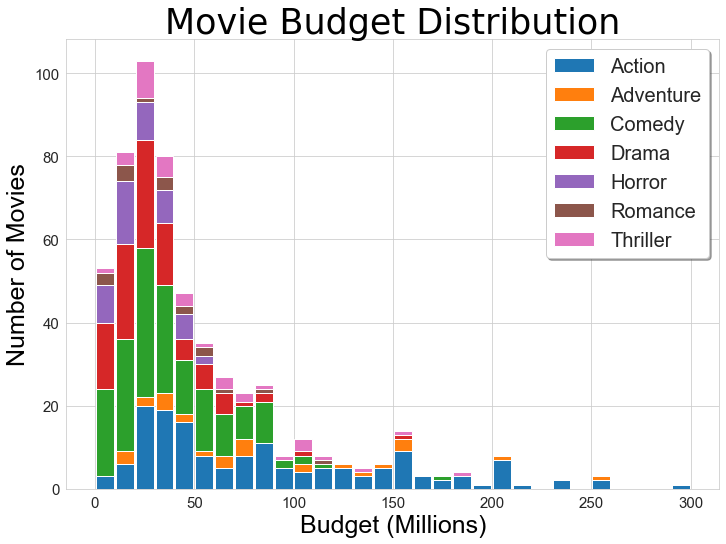

In [64]:
list1 = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
    
sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(11.7,8.27))
h = plt.hist(list1, bins=30, stacked=True, rwidth = 0.9, label=mylabels)
plt.title('Movie Budget Distribution', fontsize=35, \
         color="Black", fontname='Console')
plt.ylabel("Number of Movies", fontsize=25, color='Black')
plt.xlabel("Budget (Millions)", fontsize=25, color='Black')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(shadow=True, framealpha=1, prop={'size':20})
plt.show()